In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

import pickle

In [11]:
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()

# Access data and target
X = data.data
y = data.target

# Print dataset description
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [14]:
#Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# The data is now ready for analysis
print("Shape of training data:", X_train_scaled.shape)
print("Shape of test data:", X_test_scaled.shape)

pickle.dump(scaler, open('scaler.pkl', 'wb'))

Shape of training data: (455, 30)
Shape of test data: (114, 30)


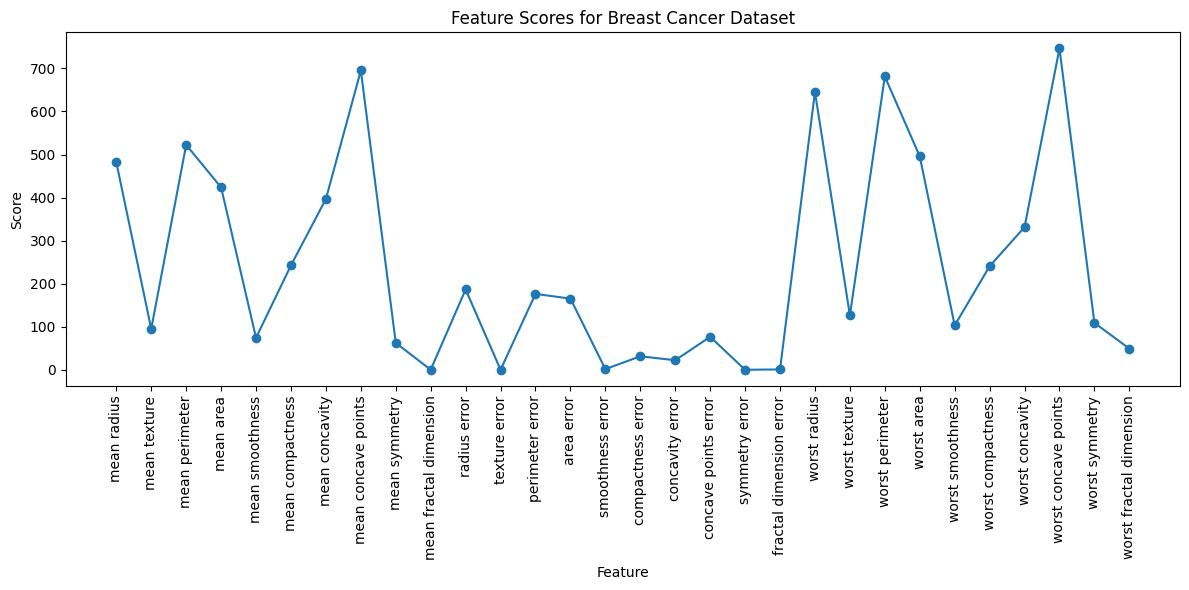

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection using SelectKBest to calculate feature scores
selector = SelectKBest(score_func=f_classif, k='all')  # Set k to 'all' to get scores for all features
selector.fit(X_train_scaled, y_train)

# Get the scores for all features
scores = selector.scores_

# Plot the scores
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(scores)), scores, marker='o', linestyle='-')
plt.xticks(np.arange(len(scores)), data.feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Scores for Breast Cancer Dataset')
plt.tight_layout()
plt.show()

In [15]:
# Feature selection using SelectKBest
# Choose the scoring function, here f_classif (ANOVA F-value)
k = 20  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature names
selected_features = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_features]

# Print the selected feature names
print(f"Top {k} selected features:")
for feature in selected_feature_names:
    print(feature)

# The data with selected features is now ready for further analysis or model training
print("Shape of training data:", X_train_selected.shape)
print("Shape of test data:", X_test_scaled.shape)

pickle.dump(selector, open('selector.pkl', 'wb'))

Top 20 selected features:
mean radius
mean texture
mean perimeter
mean area
mean compactness
mean concavity
mean concave points
radius error
perimeter error
area error
concave points error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
Shape of training data: (455, 20)
Shape of test data: (114, 30)


In [17]:
parameter_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'max_iter': [400, 800, 1000]
}

mlp = MLPClassifier(early_stopping=True, random_state=42)

grid_search = GridSearchCV(estimator=mlp, param_grid=parameter_grid, cv=5, scoring='accuracy', \
    n_jobs=-1, verbose=2)

grid_search.fit(X_train_selected, y_train)

# Best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Best estimator (model)
best_mlp = grid_search.best_estimator_

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.0001, max_iter=400, solver=adam; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.0001, max_iter=400, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.0001, max_iter=400, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.0001, max_iter=400, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.0001, max_iter=400, solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.0001, max_

In [18]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test_selected)
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

pickle.dump(best_mlp, open('best_mlp.pkl', 'wb'))

Test Set Accuracy:  0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [19]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[41  2]
 [ 2 69]]
